In [1]:
from math import sqrt
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('../weatherPM25.xlsx')
futuro = pd.read_excel('../weatherPM25.xlsx', sheet_name='Futuro')

In [3]:
data.head()

,outlook,temperature,humidity,windy,play,PM25
0,sunny,85,85,False,no,198
1,sunny,80,90,False,no,143
2,overcast,83,86,False,yes,87
3,rainy,70,96,False,yes,20
4,rainy,68,80,False,yes,30


In [4]:
futuro.head()

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,False,no
2,rainy,70,96,False,no
3,rainy,68,80,False,yes
4,rainy,65,70,False,yes


In [5]:
data.shape

(84, 6)

In [6]:
data['outlook'] = pd.factorize(data['outlook'])[0]
data['play'] = pd.factorize(data['play'])[0]
data['windy'] = pd.factorize(data['windy'])[0]

In [7]:
data.head()

,outlook,temperature,humidity,windy,play,PM25
0,0,85,85,0,0,198
1,0,80,90,0,0,143
2,1,83,86,0,1,87
3,2,70,96,0,1,20
4,2,68,80,0,1,30


In [8]:
for i in data.columns:
    print(i, data[i].unique())

outlook [0 1 2]
temperature [85 80 83 70 68 65 64 72 69 75 81 71]
humidity [85 90 86 96 80 70 65 95 75 91]
windy [0 1]
play [0 1]
PM25 [198 143  87  20  30 200  50 173  10  24   2  55  80 256 163  83  25  22
 245  58 148  15  27   3  60  84 253 193 165  90  28 298  62 164  65  92
 278 123 183 243  68  82 284 184 138  85 248  66  63  81 244 178 137 266
  59 149  67  53 264]


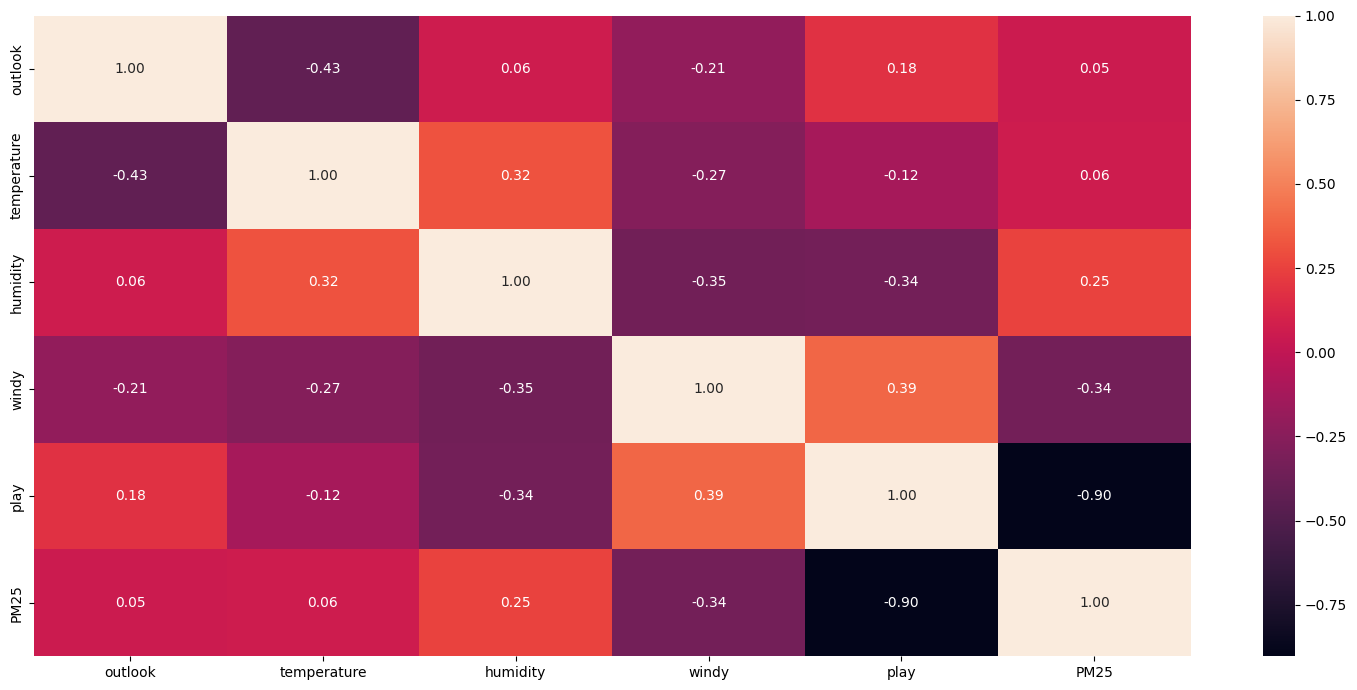

In [9]:
fig = plt.subplots(figsize = (15, 7))

sns.heatmap(
    data[
        ['outlook', 'temperature', 'humidity', 'windy', 'play','PM25']
    ].corr(),
    annot= True,
    fmt='.2f'
)

plt.tight_layout()
plt.show()

## Creacion de Modelo

In [10]:
data.columns

Index(['outlook', 'temperature', 'humidity', 'windy', 'play', 'PM25'], dtype='object')

In [11]:
num_cols = ['outlook', 'windy', 'temperature', 'humidity', 'PM25']
num_cols = ['outlook', 'windy', 'temperature', 'humidity']

scaler = StandardScaler()
sklr_ft = scaler.fit_transform(data[num_cols])

data_skld = pd.DataFrame(
    sklr_ft,
    index = data.index,
    columns = num_cols
)

data_skld.head()

,outlook,windy,temperature,humidity
0,-1.183216,-0.522233,1.804715,0.338726
1,-1.183216,-0.522233,1.015152,0.843212
2,0.000000,-0.522233,1.488890,0.439623
3,1.183216,-0.522233,-0.563974,1.448595
4,1.183216,-0.522233,-0.879799,-0.165760


In [12]:
x, y = data_skld.drop('PM25', axis = 1), data_skld['PM25']

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y,
    test_size = 0.2,
    random_state = 42,
)
modelos = {
    'linear-regression': LinearRegression().fit(xtrain, ytrain),
    'lasso-linear-regression': Lasso().fit(xtrain,ytrain),
    'ridge-linear-regression': Ridge().fit(xtrain,ytrain),
    'decision-tree': DecisionTreeRegressor().fit(xtrain,ytrain),
    'random-forest': RandomForestRegressor().fit(xtrain,ytrain),
    'boosting': GradientBoostingRegressor().fit(xtrain,ytrain),
}

KeyError: "['PM25'] not found in axis"

In [ ]:
xtest

,outlook,windy,temperature,humidity
73,1.183216,-0.522233,-0.563974,1.448595
0,-1.183216,-0.522233,1.804715,0.338726
58,0.000000,-0.522233,1.488890,0.439623
22,-1.183216,-0.522233,-0.721886,-1.174731
12,0.000000,-0.522233,1.173065,-0.670245
70,-1.183216,-0.522233,1.804715,0.338726
10,-1.183216,1.914854,0.225589,-1.174731
18,1.183216,-0.522233,-0.879799,-0.165760
4,1.183216,-0.522233,-0.879799,-0.165760
65,1.183216,-0.522233,0.225589,-0.165760


In [ ]:
predicciones = {
    'linear-regression': modelos['linear-regression'].predict(xtest),
    'lasso-linear-regression': modelos['lasso-linear-regression'].predict(xtest),
    'ridge-linear-regression': modelos['ridge-linear-regression'].predict(xtest),
    'decision-tree': modelos['decision-tree'].predict(xtest),
    'random-forest': modelos['random-forest'].predict(xtest),
    'boosting': modelos['boosting'].predict(xtest),
}

predicciones['linear-regression']

array([ 0.39652941,  0.08975922,  0.03435447,  0.08598284, -0.16464732,
        0.08975922, -0.75736102,  0.08874421,  0.08874421, -0.05238187,
       -0.16464732, -0.06834003,  0.56941733, -0.37922791,  0.26758513,
       -0.16464732, -0.06834003])

In [ ]:
# best = {
#     'modelo': '',
#     'mean_squared_error': 0,
#     'R2': 0,
#     'flag': 0
# }
# for metricas in predicciones:
#     if best['flag'] == 0:
#         best['flag'] = 1
#         best['modelo'] = metricas
#         best['mean_squared_error'] = mean_squared_error(ytest, predicciones[metricas])
#         best['R2'] = r2_score(ytest, predicciones[metricas])
    
#     else:
#         if best['mean_squared_error'] < mean_squared_error(ytest, predicciones[metricas]) and best['R2'] > r2_score(ytest, predicciones[metricas]):
#             best['modelo'] = metricas
#             best['mean_squared_error'] = mean_squared_error(ytest, predicciones[metricas])
#             best['R2'] = r2_score(ytest, predicciones[metricas])

# print(best)

for metricas in predicciones:
    print(
        "\n"
        " **********************\n",
        "* Evaluation Metrics *\n",
        "**********************\n",
        metricas, '\n',
        '\t|-> Mean Squared Error:', mean_squared_error(ytest, predicciones[metricas]), '\n'
        " \t|-> R2 Score:", r2_score(ytest, predicciones[metricas])
    )


 **********************
 * Evaluation Metrics *
 **********************
 linear-regression 
 	|-> Mean Squared Error: 1.1844319906830232 
 	|-> R2 Score: 0.06019474419285731

 **********************
 * Evaluation Metrics *
 **********************
 lasso-linear-regression 
 	|-> Mean Squared Error: 1.2821348590975141 
 	|-> R2 Score: -0.0173290562158277

 **********************
 * Evaluation Metrics *
 **********************
 ridge-linear-regression 
 	|-> Mean Squared Error: 1.1843609350949562 
 	|-> R2 Score: 0.06025112431062263

 **********************
 * Evaluation Metrics *
 **********************
 decision-tree 
 	|-> Mean Squared Error: 0.045785453601382135 
 	|-> R2 Score: 0.9636708479063628

 **********************
 * Evaluation Metrics *
 **********************
 random-forest 
 	|-> Mean Squared Error: 0.0509745715369364 
 	|-> R2 Score: 0.9595534647664286

 **********************
 * Evaluation Metrics *
 **********************
 boosting 
 	|-> Mean Squared Error: 0.048623394

## Decision Tree Optimization


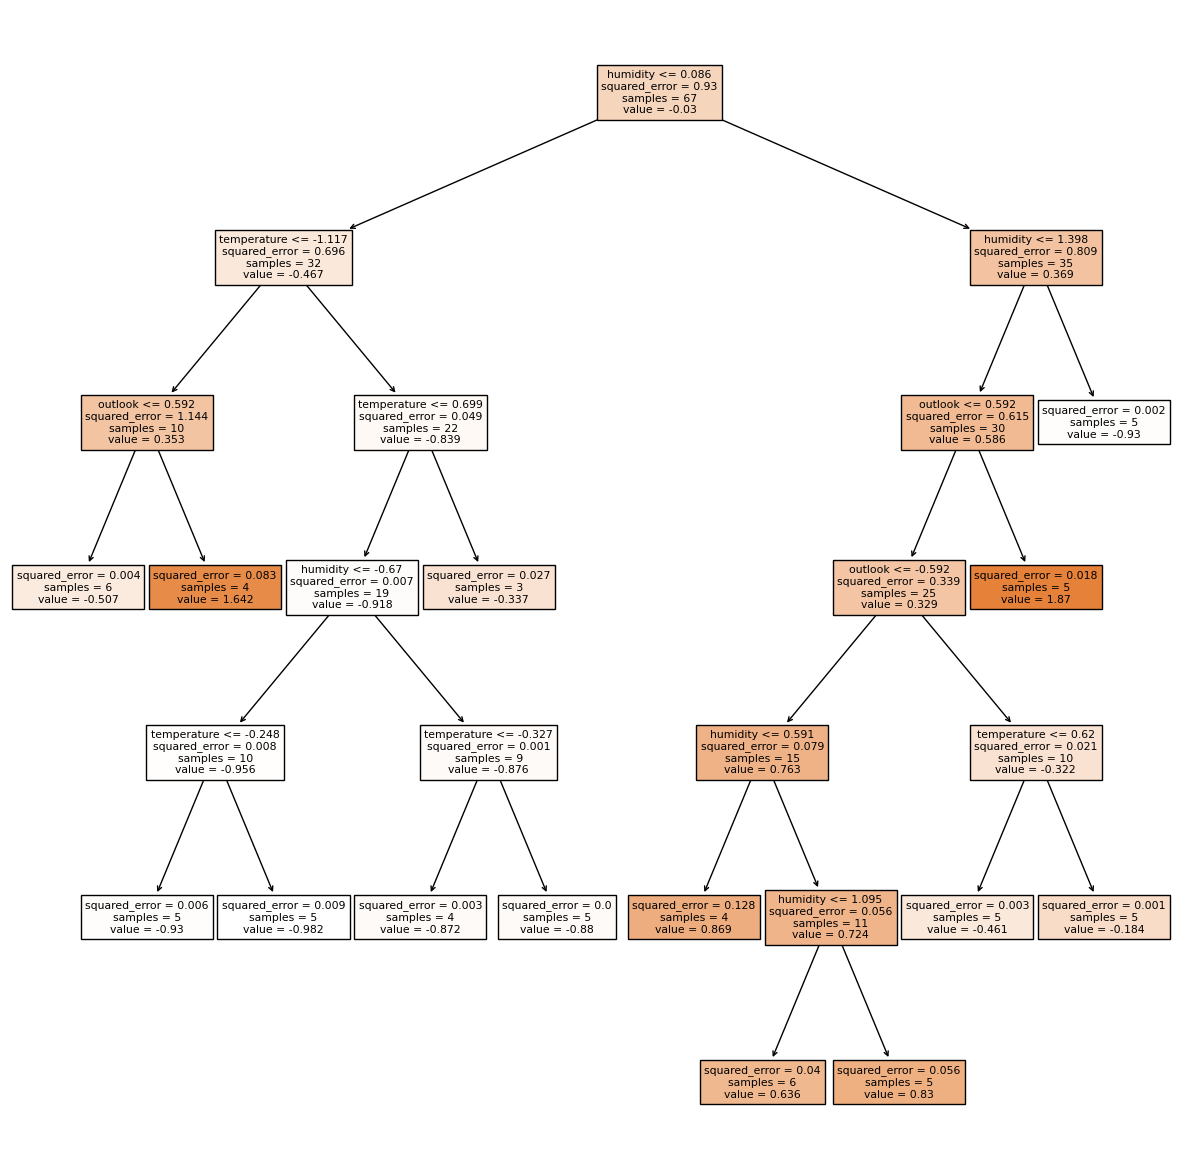

In [ ]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(modelos['decision-tree'], feature_names = list(xtrain.columns), class_names=["0", "1", "2"], filled=True)

plt.show()

In [ ]:
modelos['decision-tree'].get_depth()

6

In [ ]:
hyperparams = {
    'max_depth': [None, 1, 3, 4, 5],
}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid = hyperparams, scoring='neg_mean_squared_error', cv = 10)

grid.fit(xtrain,ytrain)

grid.best_params_

C:\Users\diego\AppData\Local\Temp\ipykernel_22472\2605689892.py:1: UserWarning: ignore
  warnings.warn('ignore')


{'max_depth': 4}

In [ ]:
model_optimized = DecisionTreeRegressor(max_depth=4)
model_optimized.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=4)

In [ ]:
print('Mean squared error:', mean_squared_error(ytest, model_optimized.predict(xtest)))
print('Mean squared error:', sqrt(mean_squared_error(ytest, model_optimized.predict(xtest))))
print('R2 Score:', r2_score(ytest, model_optimized.predict(xtest)))
xtest

Mean squared error: 0.05228670986293585
Mean squared error: 0.2286628738185013
R2 Score: 0.9585123290112139


,outlook,windy,temperature,humidity
73,1.183216,-0.522233,-0.563974,1.448595
0,-1.183216,-0.522233,1.804715,0.338726
58,0.000000,-0.522233,1.488890,0.439623
22,-1.183216,-0.522233,-0.721886,-1.174731
12,0.000000,-0.522233,1.173065,-0.670245
70,-1.183216,-0.522233,1.804715,0.338726
10,-1.183216,1.914854,0.225589,-1.174731
18,1.183216,-0.522233,-0.879799,-0.165760
4,1.183216,-0.522233,-0.879799,-0.165760
65,1.183216,-0.522233,0.225589,-0.165760


In [ ]:
print('Mean squared error:', mean_squared_error(ytrain, model_optimized.predict(xtrain)))
print('Mean squared error:', sqrt(mean_squared_error(ytrain, model_optimized.predict(xtrain))))
print('R2 Score:', r2_score(ytrain, model_optimized.predict(xtrain)))

Mean squared error: 0.030362303116641103
Mean squared error: 0.17424782098104155
R2 Score: 0.9673360310157831


In [ ]:
futuro['outlook'] = pd.factorize(futuro['outlook'])[0]
futuro['play'] = pd.factorize(futuro['play'])[0]
futuro['windy'] = pd.factorize(futuro['windy'])[0]

num_cols = ['outlook', 'windy', 'temperature', 'humidity']

fut_skld = pd.DataFrame(scaler.transform(futuro[num_cols]), index = futuro.index, columns = num_cols)

In [ ]:
# fut_skld = pd.DataFrame(
#     fut_sklr,
#     index = futuro.index,
#     columns = num_cols
# )

# fut_skld

print(xtrain.columns.tolist())
print(fut_skld.columns.tolist())

['outlook', 'windy', 'temperature', 'humidity']
['outlook', 'windy', 'temperature', 'humidity']


In [ ]:
predicted_PM25 = model_optimized.predict(fut_skld)

futuro_pred = futuro
futuro_pred['predicted_PM25'] = predicted_PM25
futuro_pred

,outlook,temperature,humidity,windy,play,predicted_PM25
0,0,85,85,0,0,0.763106
1,0,80,90,0,0,0.763106
2,1,70,96,0,0,1.870188
3,1,68,80,0,1,-0.876458
4,1,65,70,0,1,1.642178
5,0,72,95,0,1,0.763106
6,0,69,70,0,0,-0.955949
